In [1]:
# import data
# TODO: clean data
# standardize data

# Original Community
# Fig1a. Community analysis genus level (bar chart)
# Fig1b. Community analysis phylum level (bar chart)

# Effects of Perturbation

# Composition shift with change of carbon source (bar charts)
# Fig2a. Glucose
# Fig2b. Malate

# General
# Fig3. PCoA (scatterplot)

# Effects on Network Generalist-Specialist
# Fig4a. Generalist-Specialist (network)
# Fig4b. Generalist-Specialist (scatterplot)

# Effects on state transitions, time series data
# Fig5. Topological Map

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re

## Set Up Consistent Styling

*Key:*
- Shape indicates current carbon source
- Color indicates carbon series
- Marker Edge Width indicates day
- Marker Color indicates transfer series

In [3]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [4]:
map_carbon_shapes = {
    "C0": "o",
    "C": "o",
    "G": "s",
    "M": "^",
}

def_marker_size = 10

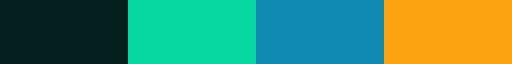

In [5]:
def_color = "black"
def_line_color = "#707070"

colors = [
    "#041F1E", # original community 
    "#06D6A0", # cellulose
    "#118AB2", # glucose
    "#FCA311", # malate
]
map_carbon_colors = {
    "C0": colors[0],
    "C": colors[1],
    "G": colors[2],
    "M": colors[3],
}
cmap = ListedColormap(colors, name="carbon")
cmap

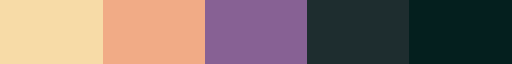

In [6]:
map_days_widths = {
    "3": 1,
    "5": 2,
    "7": 3,
    "10": 4,
    "20": 5,
}

colors_days = [
    "#F7DBA7", # 3
    "#F1AB86", # 5
    "#876194", # 7
    "#1E2D2F", # 10
    "#041F1E", # 20
]

map_days_colors = {
    "3": colors_days[0],
    "5": colors_days[1],
    "7": colors_days[2],
    "10": colors_days[3],
    "20": colors_days[4],
}

cmap_days = ListedColormap(colors_days, name="days")
cmap_days

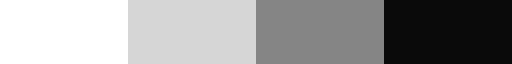

In [7]:
colors_transfers = [
    "#FFFFFF", # C0
    "#D6D6D6", # 1
    "#858585", # 2
    "#0A0A0A", # 3
]

map_transfers_colors = {
    "C0": colors_transfers[0],
    "1": colors_transfers[1],
    "2": colors_transfers[2],
    "3": colors_transfers[3],
}

cmap_transfers = ListedColormap(colors_transfers, name="transfers")
cmap_transfers

## Process Data

We are working with three files:
* `<counts>.csv`: OTUs x sample
* `<annotations>.csv`: sample x variables
* `<taxonomy>.csv`: OTUs x taxonomy

OTUs and samples must be in the same order for all files

In [8]:
df_counts = pd.read_csv("data/FCF_master.csv", index_col=0).T
df_annotations_from_file = pd.read_csv("data/FCF_annotations.csv", index_col=0) # these aren't in the right order

In [9]:
print("df_counts.shape", df_counts.shape)
df_counts.head()

df_counts.shape (87, 153)


opitutus spp.  paludibacter propionicigenes  magnetospirillum sp.  \
C0C           18304                         16452                  9817   
1C3A          19239                          4060                 13664   
1C3B          34155                          6121                 19194   
1C5A          16237                          1967                 24640   
1C5B          23247                          6002                 16356   

      rhodopseudomonas palustris  acetobacter spp.  bacteroides spp.  \
C0C                         9279              6578              6400   
1C3A                        9191               902              1891   
1C3B                       13838              1395              3117   
1C5A                        8188               720              1520   
1C5B                       16142              1381              4462   

      pleomorphomonas oryzae  afipia sp.  rhodoblastus acidophilus  \
C0C                     5409        4521                      3913   
1C3A                    3647        2798                      1163   
1C3B                    4828        3858                      1357   
1C5A                    2641        2308                      2046   
1C5B                    6110        4695                      3101   

      spirochaeta spp.  ...  bosea spp.  corynebacterium durum  \
C0C               1958  ...           0                      0   
1C3A               257  ...           0                      0   
1C3B               221  ...           0                      0   
1C5A               265  ...           0                      0   
1C5B               605  ...           0                      1   

      rubrivivax gelatinosus  anaerococcus hydrogenalis  globicatella spp.  \
C0C                        0                          0                  0   
1C3A                       0                          0                  0   
1C3B                       1                          0                  0   
1C5A                       1                          0                  0   
1C5B                       0                          0                  0   

      finegoldia magna  dietzia spp.  granulicatella elegans  \
C0C                  0             0                       0   
1C3A                 0             0                       0   
1C3B                 0             0                       0   
1C5A                 0             0                       0   
1C5B                 0             0                       0   

      actinomyces marimammalium  veillonella dispar  
C0C                           0                   0  
1C3A                          0                   0  
1C3B                          0                   0  
1C5A                          0                   0  
1C5B                          0                   0  

[5 rows x 153 columns]

In [10]:
print("df_annotations_from_file.shape", df_annotations_from_file.shape)
df_annotations_from_file.head()

df_annotations_from_file.shape (87, 3)


series       food  day
C0C      C0  cellulose   10
1C3A     1C  cellulose    3
1C3B     1C  cellulose    3
1C5A     1C  cellulose    5
1C5B     1C  cellulose    5

In [11]:
df_annotations_from_file.index == df_counts.index # these aren't in the right order

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [12]:
# Build Correct Annotations File
# order: index series carbon transfer day
df_annotations = pd.DataFrame(index=df_counts.index)
ann_series = []
ann_carbon = []
ann_transfer = []
ann_day = list(map(str, df_annotations_from_file["day"].values))

for i in df_counts.index:
    # series
    if i == "C0C":
        ann_series.append("C0")
    else:
        ann_series.append(i[1])
    # carbon
    if i == "C0C":
        ann_carbon.append("C0")
    elif df_annotations_from_file.loc[i, "food"] == "cellulose":
        ann_carbon.append("C")
    elif df_annotations_from_file.loc[i, "food"] == "glucose":
        ann_carbon.append("G")
    elif df_annotations_from_file.loc[i, "food"] == "malate":
        ann_carbon.append("M")
    else:
        ann_carbon.append("X")
    # transfer
    if i == "C0C":
        ann_transfer.append("C0")
    else:
        ann_transfer.append(i[0])

df_annotations["series"] = ann_series
df_annotations["carbon"] = ann_carbon
df_annotations["transfer"] = ann_transfer
df_annotations["day"] = ann_day

df_annotations

series carbon transfer day
C0C       C0     C0       C0  10
1C3A       C      C        1   3
1C3B       C      C        1   3
1C5A       C      C        1   5
1C5B       C      C        1   5
...      ...    ...      ...  ..
3G7A       G      C        3   7
3G7B       G      C        3   7
3G7C       G      C        3   7
3G10A      G      C        3  10
3G10B      G      C        3  10

[87 rows x 4 columns]

### Remove noisy data (OTUs that do not appear consistently)

* NOTE: 3G10C was removed because it might be a wrongly labeled result
* remove OTUs not in original sample
* remove OTUs with less than total threshold read counts across all samples
* TODO: remove OTUs that don't occur in enough samples

In [13]:
# remove OTUs not in original sample
threshold = 1
not_in_original = df_counts.columns[df_counts.loc['C0C'] < threshold]
# --- what OTUs are not in original sample?
print("Throw out OTUs that were not in origianl C0C community:", not_in_original, "length:", len(not_in_original))
df_not_in_original = df_counts[not_in_original]
df_not_in_original.sum(axis=0)

Throw out OTUs that were not in origianl C0C community: Index(['pseudomonas veronii', 'streptococcus salivarius',
       'stenotrophomonas spp.', 'zoogloea sp.', 'bordetella hinzii',
       'cytophaga spp.', 'rhizobium straminoryzae', 'methanosaeta sp.',
       'pontibacter korlensis', 'bacteroides fragilis',
       'sphingobium yanoikuyae', 'rhodothermus spp.', 'rhodovibrio sodomensis',
       'rhizobium sp.', 'enterobacter sp.', 'gemmatimonas spp.',
       'bacteroides caccae', 'eubacterium rectale', 'citrobacter sp.',
       'pseudomonas spp.', 'hydrogenophaga spp.', 'atopostipes sp.',
       'rhodovibrio spp.', 'ochrobactrum intermedium',
       'pseudochrobactrum kiredjianiae', 'steroidobacter spp.',
       'oligotropha carboxidovorans', 'salinibacter spp.',
       'pantoea agglomerans', 'chelatococcus spp.', 'streptococcus sanguinis',
       'afipia broomeae', 'prevotella sp.', 'thioalkalivibrio spp.',
       'methyloligella halotolerans', 'rhodopseudomonas oryzae',
       'porph

pseudomonas veronii          4119
streptococcus salivarius     2503
stenotrophomonas spp.         114
zoogloea sp.                   62
bordetella hinzii              29
                             ... 
finegoldia magna                4
dietzia spp.                    4
granulicatella elegans          4
actinomyces marimammalium       3
veillonella dispar              3
Length: 84, dtype: int64

In [14]:
df_counts = df_counts.drop(not_in_original, axis=1)
df_counts

opitutus spp.  paludibacter propionicigenes  magnetospirillum sp.  \
C0C            18304                         16452                  9817   
1C3A           19239                          4060                 13664   
1C3B           34155                          6121                 19194   
1C5A           16237                          1967                 24640   
1C5B           23247                          6002                 16356   
...              ...                           ...                   ...   
3G7A           25593                           319                  3256   
3G7B           36316                           109                  3496   
3G7C           34948                           136                  4123   
3G10A          17610                           250                 18156   
3G10B          16218                            86                 32377   

       rhodopseudomonas palustris  acetobacter spp.  bacteroides spp.  \
C0C                          9279              6578              6400   
1C3A                         9191               902              1891   
1C3B                        13838              1395              3117   
1C5A                         8188               720              1520   
1C5B                        16142              1381              4462   
...                           ...               ...               ...   
3G7A                        11598             10247             69747   
3G7B                         7593              9236             40432   
3G7C                         9157             12384             40225   
3G10A                       16920              8832             72267   
3G10B                        7254              8338             38665   

       pleomorphomonas oryzae  afipia sp.  rhodoblastus acidophilus  \
C0C                      5409        4521                      3913   
1C3A                     3647        2798                      1163   
1C3B                     4828        3858                      1357   
1C5A                     2641        2308                      2046   
1C5B                     6110        4695                      3101   
...                       ...         ...                       ...   
3G7A                    28315         891                      7625   
3G7B                    30320         703                      3922   
3G7C                    28382         721                      4594   
3G10A                   27647        1603                      9659   
3G10B                   16342         766                      2289   

       spirochaeta spp.  ...  escherichia vulneris  brevundimonas spp.  \
C0C                1958  ...                     1                   1   
1C3A                257  ...                     0                   0   
1C3B                221  ...                     2                   0   
1C5A                265  ...                     5                   8   
1C5B                605  ...                    10                   2   
...                 ...  ...                   ...                 ...   
3G7A                 15  ...                     5                   0   
3G7B                 15  ...                     7                   0   
3G7C                 16  ...                     2                   5   
3G10A                 1  ...                     0                   0   
3G10B                59  ...                     0                   0   

       parabacteroides distasonis  nitrobacter hamburgensis  vitis vinifera  \
C0C                             1                         1               1   
1C3A                            0                         0               0   
1C3B                            0                         0               1   
1C5A                            0                         2               0   
1C5B                            1                         4               1   
.

In [15]:
# remove OTUs with less than threshold read counts
threshold = 20
too_low_read_counts = df_counts.columns[df_counts.sum(axis=0) < threshold]
# --- what OTUs have too low read counts?
print("Throw out OTUs with low read counts:", too_low_read_counts, "length:", len(too_low_read_counts))
df_too_low_read_counts = df_counts[too_low_read_counts]
df_too_low_read_counts.sum(axis=0)

Throw out OTUs with low read counts: Index(['desulfovibrio desulfuricans', 'bradyrhizobium elkanii',
       'clostridium spp.', 'vitis vinifera', 'methylocystis heyerii',
       'micrococcus luteus', 'delftia sp.', 'methylobacillus sp.',
       'rhodobacter capsulatus'],
      dtype='object') length: 9


desulfovibrio desulfuricans     5
bradyrhizobium elkanii          7
clostridium spp.                6
vitis vinifera                 19
methylocystis heyerii          14
micrococcus luteus              5
delftia sp.                     4
methylobacillus sp.             3
rhodobacter capsulatus          3
dtype: int64

In [16]:
df_counts = df_counts.drop(too_low_read_counts, axis=1)
df_counts

opitutus spp.  paludibacter propionicigenes  magnetospirillum sp.  \
C0C            18304                         16452                  9817   
1C3A           19239                          4060                 13664   
1C3B           34155                          6121                 19194   
1C5A           16237                          1967                 24640   
1C5B           23247                          6002                 16356   
...              ...                           ...                   ...   
3G7A           25593                           319                  3256   
3G7B           36316                           109                  3496   
3G7C           34948                           136                  4123   
3G10A          17610                           250                 18156   
3G10B          16218                            86                 32377   

       rhodopseudomonas palustris  acetobacter spp.  bacteroides spp.  \
C0C                          9279              6578              6400   
1C3A                         9191               902              1891   
1C3B                        13838              1395              3117   
1C5A                         8188               720              1520   
1C5B                        16142              1381              4462   
...                           ...               ...               ...   
3G7A                        11598             10247             69747   
3G7B                         7593              9236             40432   
3G7C                         9157             12384             40225   
3G10A                       16920              8832             72267   
3G10B                        7254              8338             38665   

       pleomorphomonas oryzae  afipia sp.  rhodoblastus acidophilus  \
C0C                      5409        4521                      3913   
1C3A                     3647        2798                      1163   
1C3B                     4828        3858                      1357   
1C5A                     2641        2308                      2046   
1C5B                     6110        4695                      3101   
...                       ...         ...                       ...   
3G7A                    28315         891                      7625   
3G7B                    30320         703                      3922   
3G7C                    28382         721                      4594   
3G10A                   27647        1603                      9659   
3G10B                   16342         766                      2289   

       spirochaeta spp.  ...  ochrobactrum anthropi  \
C0C                1958  ...                      1   
1C3A                257  ...                      4   
1C3B                221  ...                      5   
1C5A                265  ...                     24   
1C5B                605  ...                     20   
...                 ...  ...                    ...   
3G7A                 15  ...                     22   
3G7B                 15  ...                     15   
3G7C                 16  ...                     28   
3G10A                 1  ...                      4   
3G10B                59  ...                      3   

       nitrospirillum azospirillum amazonense  acinetobacter junii  \
C0C                                         1                    1   
1C3A                                        0                    0   
1C3B                                        2                    4   
1C5A                                       70                    0   
1C5B                                       53                    1   
...                                       ...                  ...   
3G7A                                        7                    0   
3G7B                                        4                    0   
3G7C                                       12                    0   
3G1

### Standardize Data

Transform absolute counts to relative abundances.
Relative counts for a sample should add up to 1.
Do this by dividing counts in each sample by total counts in sample.

In [17]:
df_counts_rel = df_counts.div(df_counts.sum(axis=1), axis=0)
df_counts_rel.head()

opitutus spp.  paludibacter propionicigenes  magnetospirillum sp.  \
C0C        0.207712                      0.186696              0.111402   
1C3A       0.267023                      0.056350              0.189646   
1C3B       0.290520                      0.052065              0.163263   
1C5A       0.194220                      0.023528              0.294733   
1C5B       0.187924                      0.048519              0.132219   

      rhodopseudomonas palustris  acetobacter spp.  bacteroides spp.  \
C0C                     0.105297          0.074647          0.072627   
1C3A                    0.127564          0.012519          0.026246   
1C3B                    0.117705          0.011866          0.026513   
1C5A                    0.097941          0.008612          0.018182   
1C5B                    0.130489          0.011164          0.036070   

      pleomorphomonas oryzae  afipia sp.  rhodoblastus acidophilus  \
C0C                 0.061381    0.051304                  0.044404   
1C3A                0.050618    0.038834                  0.016142   
1C3B                0.041067    0.032816                  0.011543   
1C5A                0.031591    0.027607                  0.024473   
1C5B                0.049392    0.037954                  0.025068   

      spirochaeta spp.  ...  ochrobactrum anthropi  \
C0C           0.022219  ...               0.000011   
1C3A          0.003567  ...               0.000056   
1C3B          0.001880  ...               0.000043   
1C5A          0.003170  ...               0.000287   
1C5B          0.004891  ...               0.000162   

      nitrospirillum azospirillum amazonense  acinetobacter junii  \
C0C                                 0.000011             0.000011   
1C3A                                0.000000             0.000000   
1C3B                                0.000017             0.000034   
1C5A                                0.000837             0.000000   
1C5B                                0.000428             0.000008   

      propionibacterium acnes  brevundimonas sp.  rhizobium petrolearium  \
C0C                  0.000011           0.000011                0.000011   
1C3A                 0.000042           0.000014                0.000000   
1C3B                 0.000009           0.000000                0.000009   
1C5A                 0.000012           0.000287                0.000000   
1C5B                 0.000008           0.000129                0.000008   

      escherichia vulneris  brevundimonas spp.  parabacteroides distasonis  \
C0C               0.000011            0.000011                    0.000011   
1C3A              0.000000            0.000000                    0.000000   
1C3B              0.000017            0.000000                    0.000000   
1C5A              0.000060            0.000096                    0.000000   
1C5B              0.000081            0.000016                    0.000008   

      nitrobacter hamburgensis  
C0C                   0.000011  
1C3A                  0.000000  
1C3B                  0.000000  
1C5A                  0.000024  
1C5B                  0.000032  

[5 rows x 60 columns]

In [18]:
# check that samples sum to 1
df_counts_rel.sum(axis=1)

C0C      1.0
1C3A     1.0
1C3B     1.0
1C5A     1.0
1C5B     1.0
        ... 
3G7A     1.0
3G7B     1.0
3G7C     1.0
3G10A    1.0
3G10B    1.0
Length: 87, dtype: float64

## Split Labels

In [19]:
from collections import Counter

In [20]:
original = df_counts_rel.loc['C0C']
labels = original.index
family_labels = [i.split()[0] for i in labels]
family_count = Counter(family_labels)

Text(0.5, 0, 'OTUs')

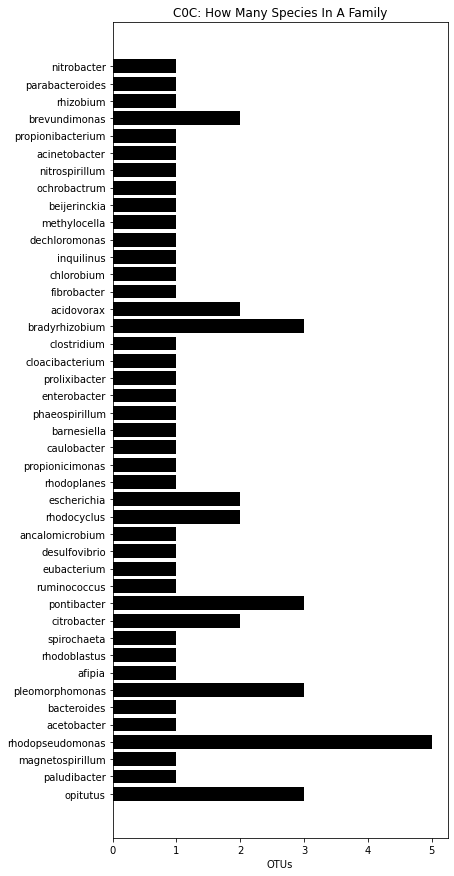

In [21]:
# just get a sense of how many species are in a family
f, ax = plt.subplots(figsize=(6, 15))
ax.barh(list(family_count.keys()), list(family_count.values()), color=def_color)
ax.set_title("C0C: How Many Species In A Family")
ax.set_xlabel("OTUs")

Text(0.5, 0, 'Summed Absolute OTU Read Counts')

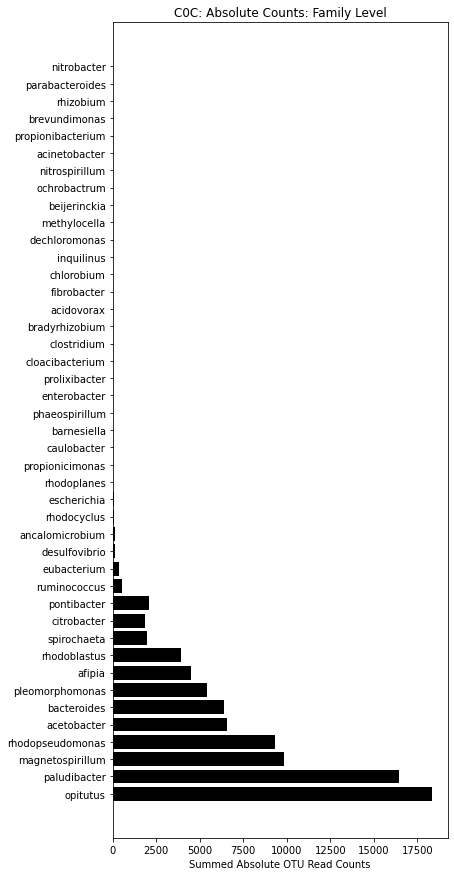

In [25]:
original = df_counts.loc['C0C']
col_mapper = {i: i.split()[0] for i in original.index}
original_by_family = original.rename(col_mapper)
original_by_family = original_by_family.groupby(level=0, sort=False).sum()

searchstring = "C0C"
f, ax = plt.subplots(figsize=(6, 15))
for sample_label in df_counts_rel.index:
    if sample_label.startswith(searchstring):
        data = original_by_family
        # set plot variables
        carbon_style = map_carbon_colors["C0"]
        series_style = map_carbon_shapes["C0"]
        day_style = 0
        transfer_style = None      
        ax.barh(data.index, data.values, color=def_color)
ax.set_title("{}: Absolute Counts: Family Level".format(searchstring))
ax.set_xlabel("Summed Absolute OTU Read Counts")

KeyError: 'C0'

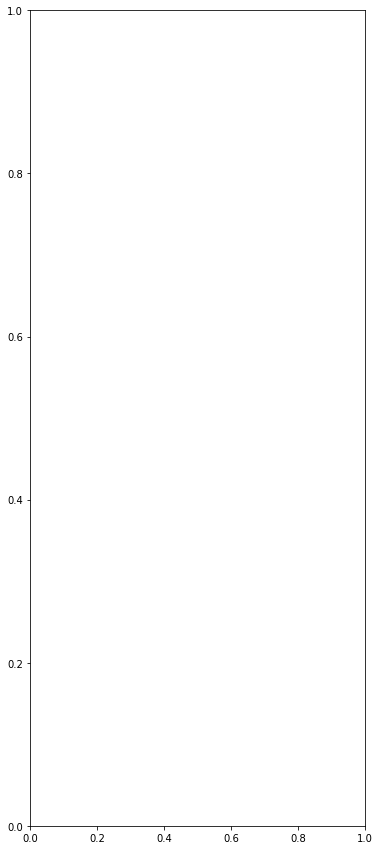

In [26]:
original = df_counts_rel.loc['C0C']
col_mapper = {i: i.split()[0] for i in original.index}
original_by_family = original.rename(col_mapper)
original_by_family = original_by_family.groupby(level=0, sort=False).sum()

searchstring = "C0C"
f, ax = plt.subplots(figsize=(6, 15))
for sample_label in df_counts_rel.index:
    if sample_label.startswith(searchstring):
        data = original_by_family
        # set plot variables
        series_style = map_carbon_colors["C0"]
        carbon_style = map_carbon_shapes["C0"]
        day_style = map_days_widths['C0']
        transfer_style = map_transfers_colors['C0']        
        # set plot styling
        (markerline, stemlines, baseline) = ax.stem(data.index, data.values, orientation="horizontal")
        plt.setp(markerline, markersize=def_marker_size, color=series_style, marker=carbon_style, markeredgecolor=transfer_style, markeredgewidth=day_style)
        plt.setp(stemlines, "color", def_line_color)
        plt.setp(baseline, "color", def_line_color)
#         ax.barh(data.index, data.values, color=def_color)
ax.set_title("{}: Relative Counts: Family Level".format(searchstring))
ax.set_xlabel("Summed Relative OTU Read Counts")

## Inspect Data

Make bar charts to:
* Observe original community
* Observe composition shift as effect of carbon perturbation
* Make sure no samples look weird

Log Scale is favorable because small fluctuations in large numbers do not matter as much

Text(0.5, 0, 'Absolute Counts')

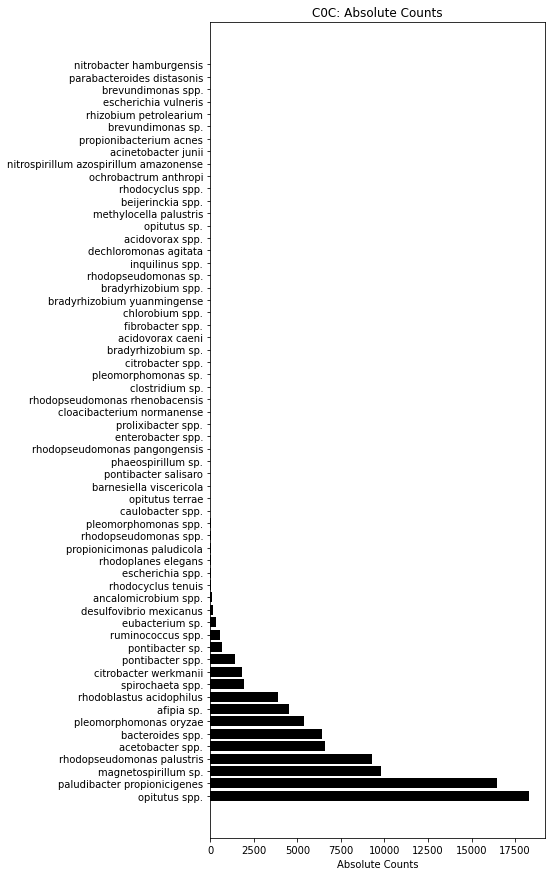

In [27]:
data = df_counts.loc['C0C']
f, ax = plt.subplots(figsize=(6, 15))
ax.barh(data.index, data.values, color=def_color)
ax.set_title("C0C: Absolute Counts")
ax.set_xlabel("Absolute Counts")

Text(0.5, 0, 'Log Absolute Counts')

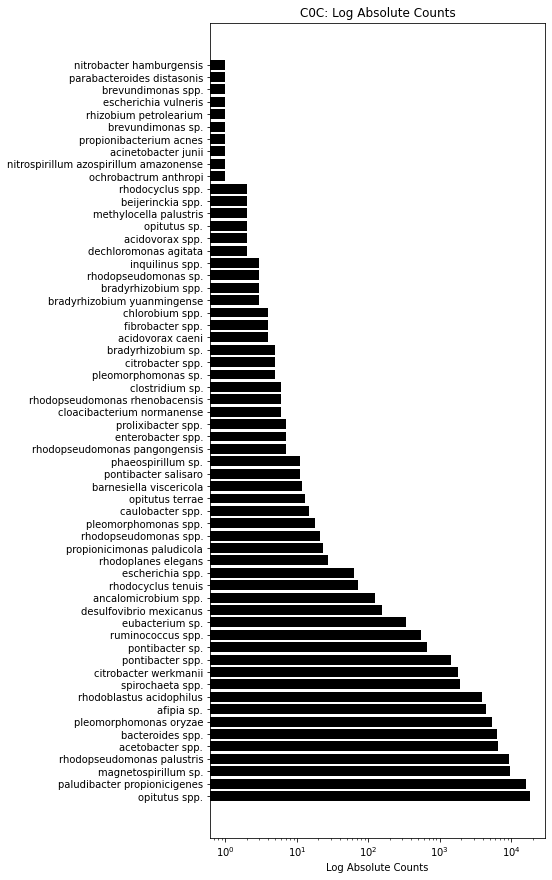

In [28]:
data = df_counts.loc['C0C']
f, ax = plt.subplots(figsize=(6, 15))
ax.barh(data.index, data.values, log=True, color=def_color)
ax.set_title("C0C: Log Absolute Counts")
ax.set_xlabel("Log Absolute Counts")

## Composition Analysis

In [29]:
def rel_count_stem(df_counts_rel, df_annotations, searchstring):
    f, ax = plt.subplots(figsize=(6, 15))
    for sample_label in df_counts_rel.index:
        if sample_label.startswith(searchstring):
            data = df_counts_rel.loc[sample_label]
            # set plot variables
            series_style = map_carbon_colors[df_annotations.loc[sample_label, "series"]]
            carbon_style = map_carbon_shapes[df_annotations.loc[sample_label, "carbon"]]
            day_style = map_days_widths[df_annotations.loc[sample_label, "day"]]
            transfer_style = map_transfers_colors[df_annotations.loc[sample_label, "transfer"]]    
            # set plot styling
            (markerline, stemlines, baseline) = ax.stem(data.index, data.values, orientation="horizontal")
            plt.setp(markerline, markersize=def_marker_size, color=series_style, marker=carbon_style, markeredgecolor=transfer_style, markeredgewidth=day_style)
            plt.setp(stemlines, "color", def_line_color)
            plt.setp(baseline, "color", def_line_color)
            plt.xlim([0, 1])
    ax.set_title("{}: Relative Counts".format(searchstring))
    ax.set_xlabel("Relative Counts")

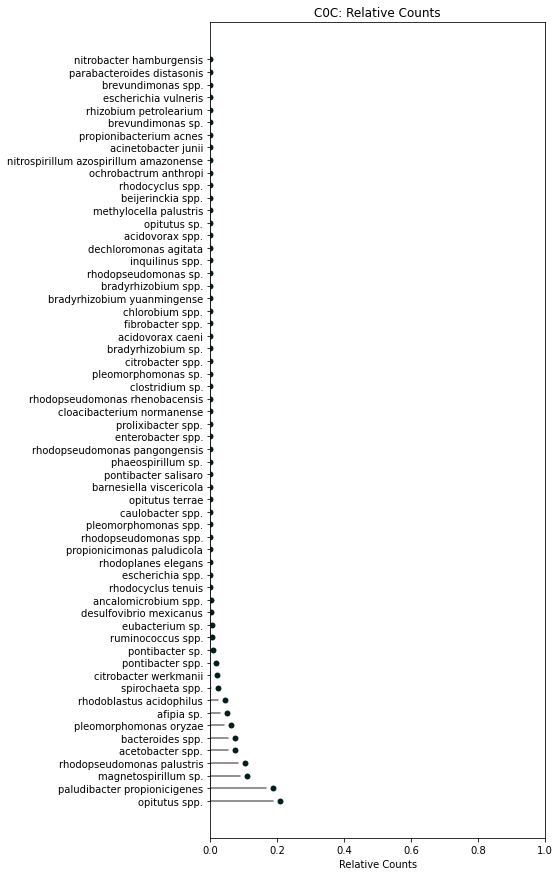

In [30]:
rel_count_stem(df_counts_rel, df_annotations, "C0C")

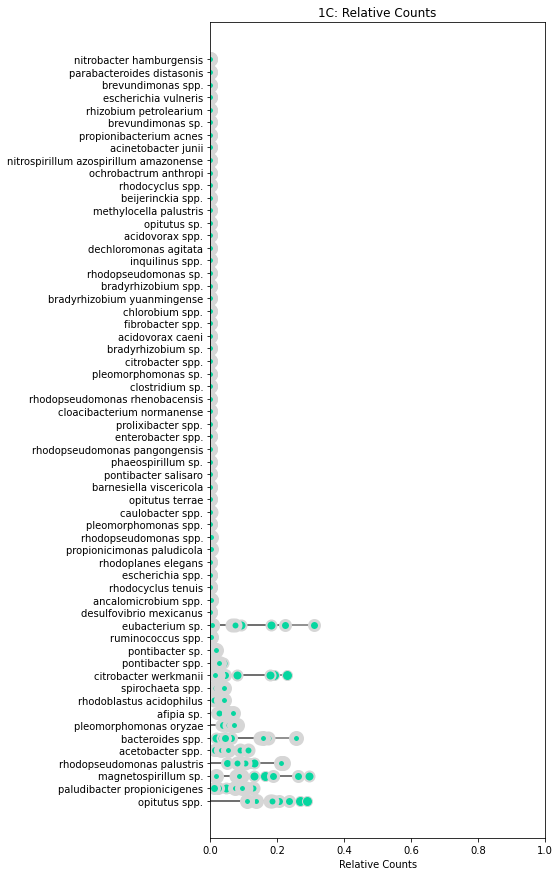

In [31]:
rel_count_stem(df_counts_rel, df_annotations, "1C")

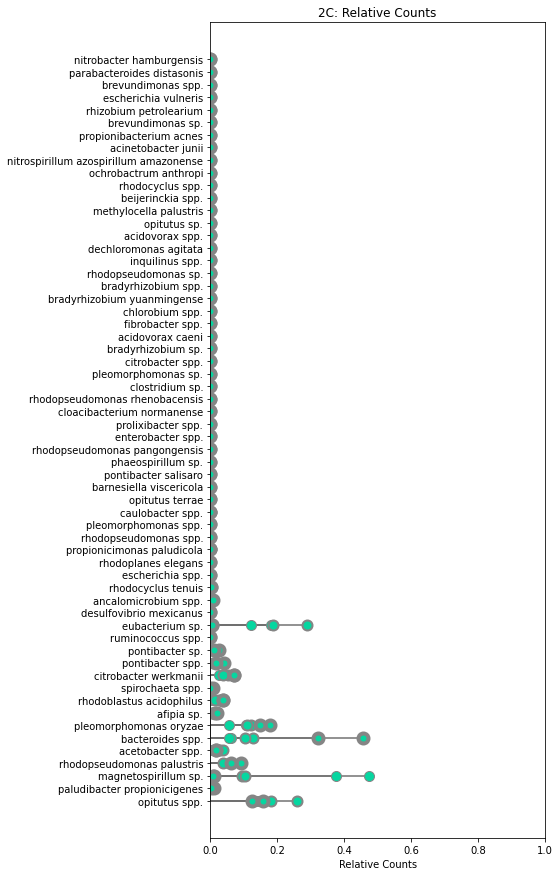

In [32]:
rel_count_stem(df_counts_rel, df_annotations, "2C")

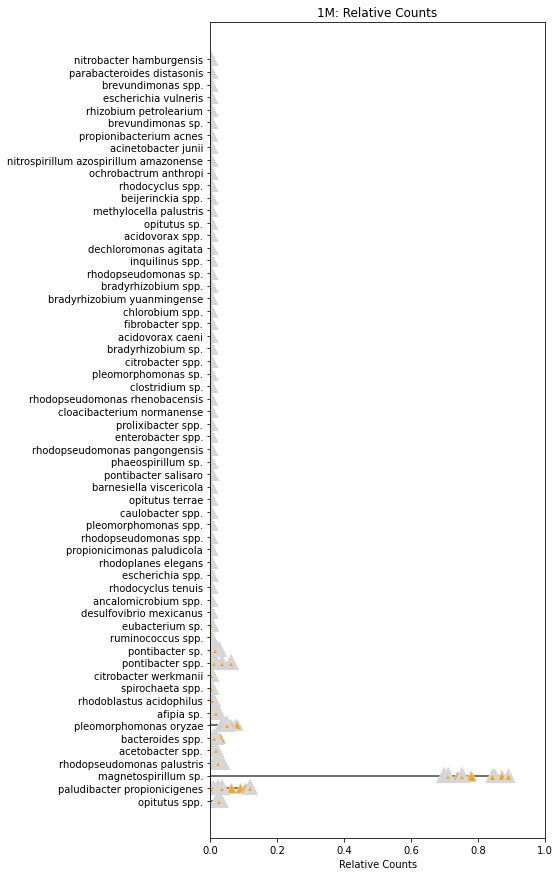

In [33]:
rel_count_stem(df_counts_rel, df_annotations, "1M")

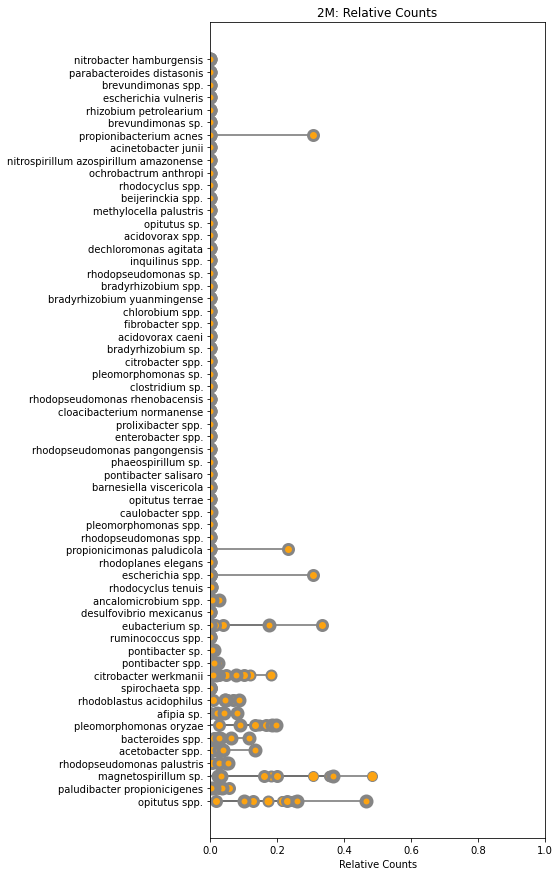

In [34]:
rel_count_stem(df_counts_rel, df_annotations, "2M")

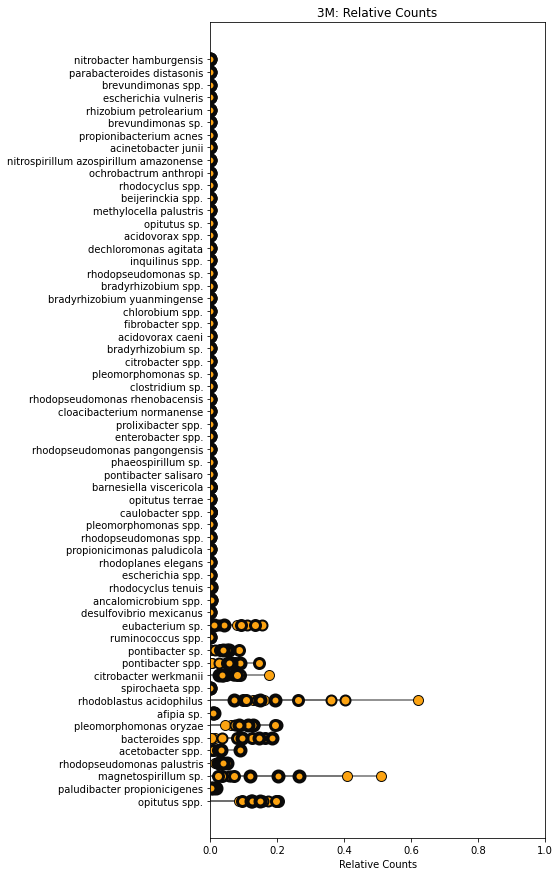

In [35]:
rel_count_stem(df_counts_rel, df_annotations, "3M")

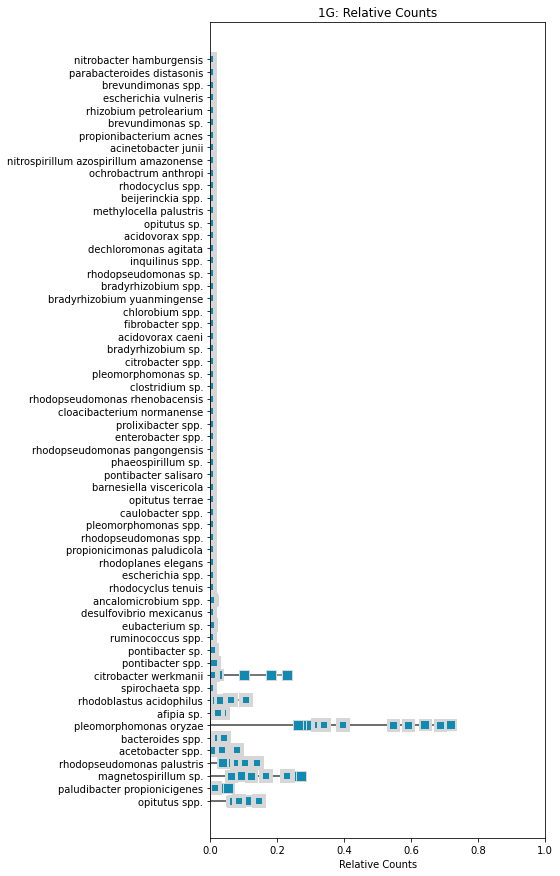

In [36]:
rel_count_stem(df_counts_rel, df_annotations, "1G")

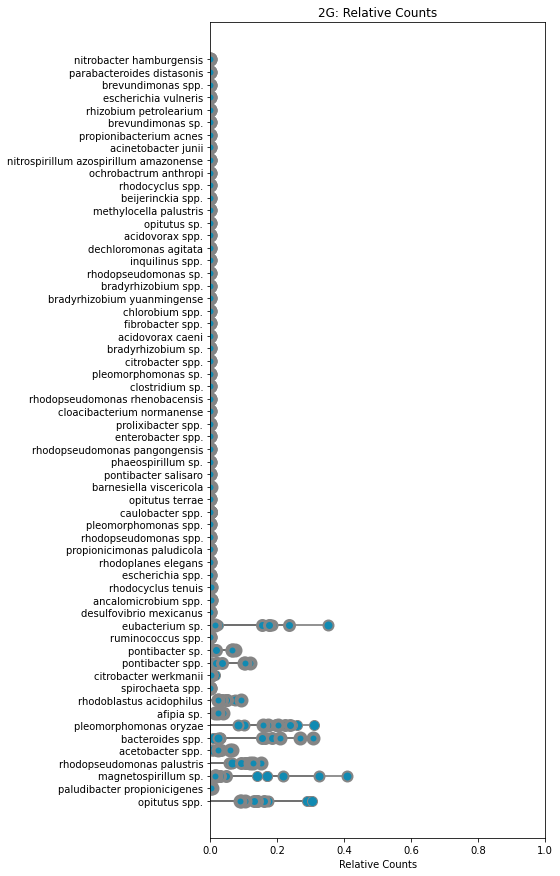

In [37]:
rel_count_stem(df_counts_rel, df_annotations, "2G")

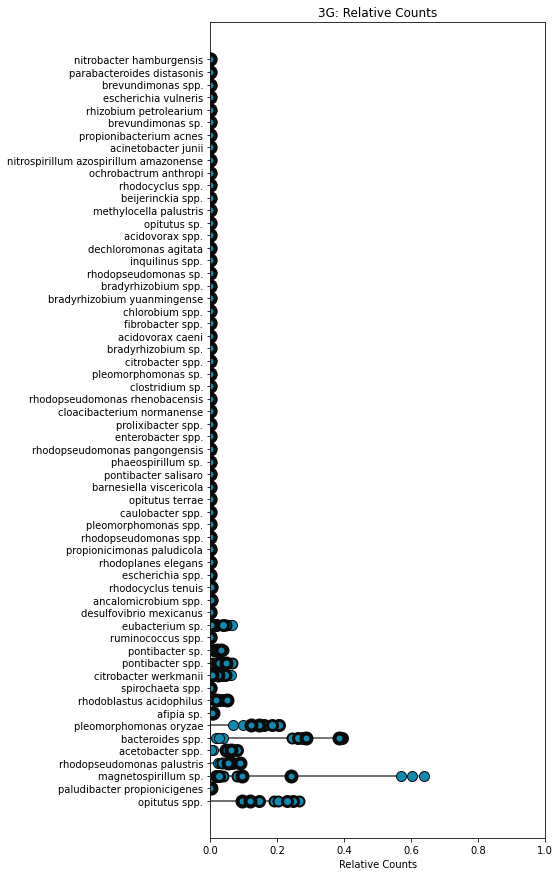

In [38]:
rel_count_stem(df_counts_rel, df_annotations, "3G")

# PCoA with Bray-Curtis Distance

* compute Bray-Curtis distances, a beta diversity metric, between all pairs of samples
* perform principal coordinates analysis (PCoA) on our the distance matrix

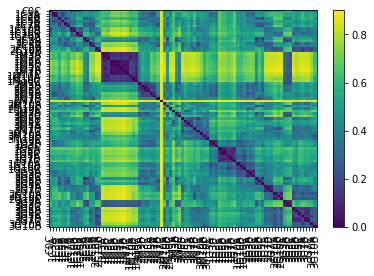

In [39]:
from skbio.diversity import beta_diversity
bc_dm = beta_diversity("braycurtis", df_counts_rel.values, df_counts_rel.index)
bc_dm

In [40]:
from skbio.stats.ordination import pcoa
bc_pc = pcoa(bc_dm)
print(bc_pc)
bc_pc_cum_sum = bc_pc.eigvals / bc_pc.eigvals.sum()
num_comp = 3
print(num_comp, "Components Explained Variance:", sum(bc_pc_cum_sum[0:num_comp]))

Ordination results:
	Method: Principal Coordinate Analysis (PCoA)
	Eigvals: 87
	Proportion explained: 87
	Features: N/A
	Samples: 87x87
	Biplot Scores: N/A
	Sample constraints: N/A
	Feature IDs: N/A
	Sample IDs: 'C0C', '1C3A', '1C3B', '1C5A', '1C5B', '1C7A', '1C7B', '1C10A', '1C10B', ...
3 Components Explained Variance: 0.6273218155542463


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.17415831440648843 and the largest is 5.697363488611947.
  warn(


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/skbio/stats/ordination/_ordination_results.py:285: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


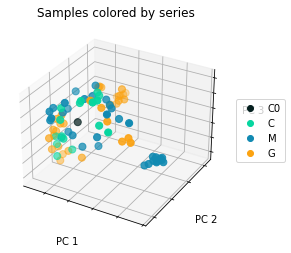

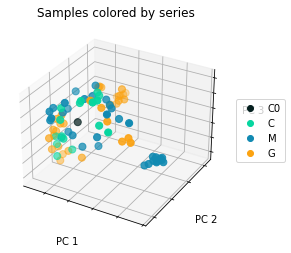

In [41]:
bc_pc.plot(df_annotations, "series", axis_labels=('PC 1', 'PC 2', 'PC 3'), title='Samples colored by series', cmap=cmap, s=50)

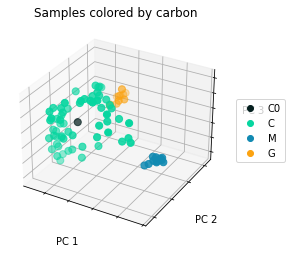

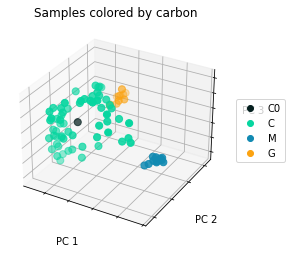

In [42]:
bc_pc.plot(df_annotations, "carbon", axis_labels=('PC 1', 'PC 2', 'PC 3'), title='Samples colored by carbon', cmap=cmap, s=50)

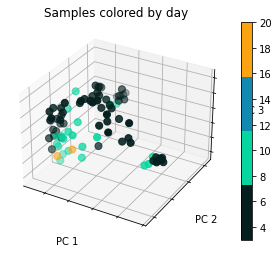

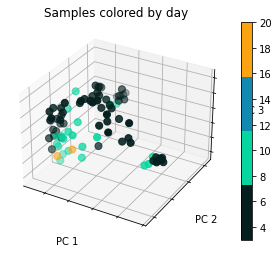

In [43]:
bc_pc.plot(df_annotations, "day", axis_labels=('PC 1', 'PC 2', 'PC 3'), title='Samples colored by day', cmap=cmap, s=50)

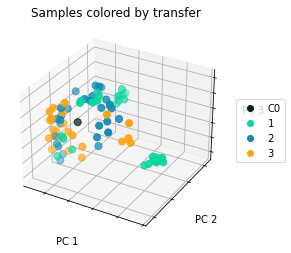

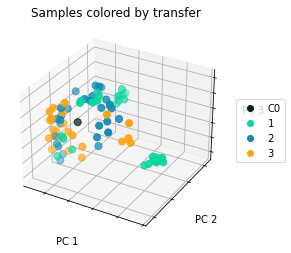

In [44]:
bc_pc.plot(df_annotations, "transfer", axis_labels=('PC 1', 'PC 2', 'PC 3'), title='Samples colored by transfer', cmap=cmap, s=50)

Ordination techniques, such as PCoA, are useful for exploratory analysis. The next step is to quantify the strength of the grouping/clustering that we see in ordination plots. There are many statistical methods available to accomplish this; many operate on distance matrices. Let’s use ANOSIM to quantify the strength of the clustering we see in the ordination plots above, using the Bray-Curtis distance matrix and sample metadata.

In [55]:
from skbio.stats.distance import anosim

In [59]:
results = anosim(bc_dm, df_annotations, column='carbon', permutations=999)
print("carbon clustering", results['test statistic'])
print("\t p-value", results['p-value'])

results = anosim(bc_dm, df_annotations, column='day', permutations=999)
print("day dlustering", results['test statistic'])
print("\t p-value", results['p-value'])

results = anosim(bc_dm, df_annotations, column='transfer', permutations=999)
print("transfer clustering", results['test statistic'])
print("\t p-value", results['p-value'])                                                                                                                                

carbon clustering 0.548044404367239
	 p-value 0.001
day dlustering 0.13217302797343009
	 p-value 0.001
transfer clustering 0.1638186772097984
	 p-value 0.001


The positive value of ANOSIM's R statistic indicates clustering, and the p-value is significant at an alpha of 0.1.

Making a prettier plot...

In [47]:
bc_pc.samples

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
C0C   -0.118473 -0.040791  0.003594 -0.236450  0.096253  0.094486  0.122100   
1C3A   0.007194  0.028954  0.169968 -0.244901  0.193910  0.015144  0.013872   
1C3B  -0.012851  0.036431  0.182384 -0.251197  0.209163  0.033677 -0.002301   
1C5A   0.085622 -0.090356  0.214688 -0.136277 -0.078916  0.032647 -0.025952   
1C5B  -0.076006 -0.067289  0.151378 -0.173959  0.071287  0.067691  0.082688   
...         ...       ...       ...       ...       ...       ...       ...   
3G7A  -0.303995 -0.090484 -0.195934  0.035112  0.004603 -0.048990 -0.075445   
3G7B  -0.311526 -0.033321 -0.104755 -0.018598  0.055582 -0.047740 -0.138101   
3G7C  -0.304203 -0.070833 -0.073814 -0.021135  0.032581 -0.040066 -0.128781   
3G10A -0.220463 -0.021441 -0.224749 -0.008318 -0.011835 -0.046924 -0.010949   
3G10B -0.066795 -0.068349 -0.207381 -0.032306 -0.051542 -0.123793 -0.031243   

            PC8       PC9      PC10  ...  PC78  PC79  PC80  PC81  PC82  PC83  \
C0C   -0.123835 -0.010679  0.066831  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1C3A   0.055638 -0.006167 -0.037025  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1C3B   0.058480 -0.020875 -0.027864  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1C5A   0.064119  0.017580 -0.064788  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1C5B   0.132588 -0.060803 -0.037799  ...   0.0   0.0   0.0   0.0   0.0   0.0   
...         ...       ...       ...  ...   ...   ...   ...   ...   ...   ...   
3G7A  -0.013802 -0.035015 -0.048020  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3G7B  -0.093139 -0.009655  0.005729  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3G7C  -0.077110 -0.033523 -0.001611  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3G10A  0.013990 -0.036596 -0.047148  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3G10B  0.029435 -0.018728  0.003939  ...   0.0   0.0   0.0   0.0   0.0   0.0   

       PC84  PC85  PC86  PC87  
C0C     0.0   0.0   0.0   0.0  
1C3A    0.0   0.0   0.0   0.0  
1C3B    0.0   0.0   0.0   0.0  
1C5A    0.0   0.0   0.0   0.0  
1C5B    0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...  
3G7A    0.0   0.0   0.0   0.0  
3G7B    0.0   0.0   0.0   0.0  
3G7C    0.0   0.0   0.0   0.0  
3G10A   0.0   0.0   0.0   0.0  
3G10B   0.0   0.0   0.0   0.0  

[87 rows x 87 columns]

Text(0, 0.5, 'PC 2')

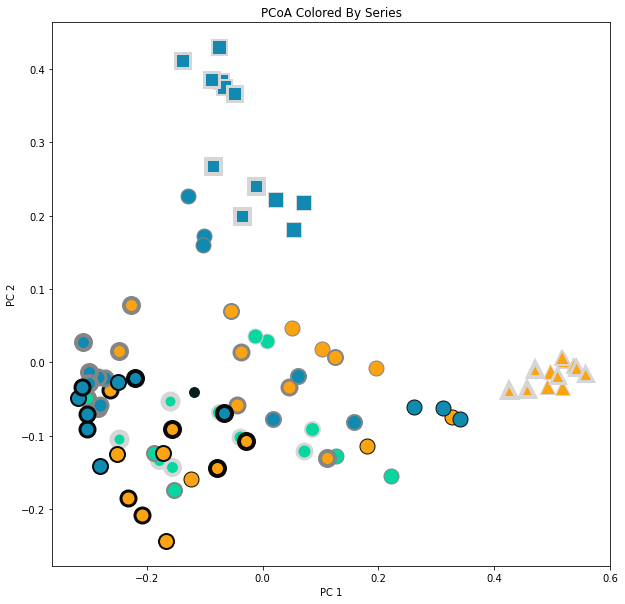

In [48]:
f, ax = plt.subplots(figsize=(10, 10))
for sample_label in df_counts_rel.index:
    data = bc_pc.samples.loc[sample_label]
    # set plot variables
    series_style = map_carbon_colors[df_annotations.loc[sample_label, "series"]]
    carbon_style = map_carbon_shapes[df_annotations.loc[sample_label, "carbon"]]
    day_style = map_days_widths[df_annotations.loc[sample_label, "day"]]
    transfer_style = map_transfers_colors[df_annotations.loc[sample_label, "transfer"]]    
    # set plot styling
    plotline = ax.plot(data["PC1"], data["PC2"])
    plt.setp(plotline, markersize=15, color=series_style, marker=carbon_style, markeredgecolor=transfer_style, markeredgewidth=day_style)
ax.set_title("PCoA Colored By Series")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")

Text(0, 0.5, 'PC 2')

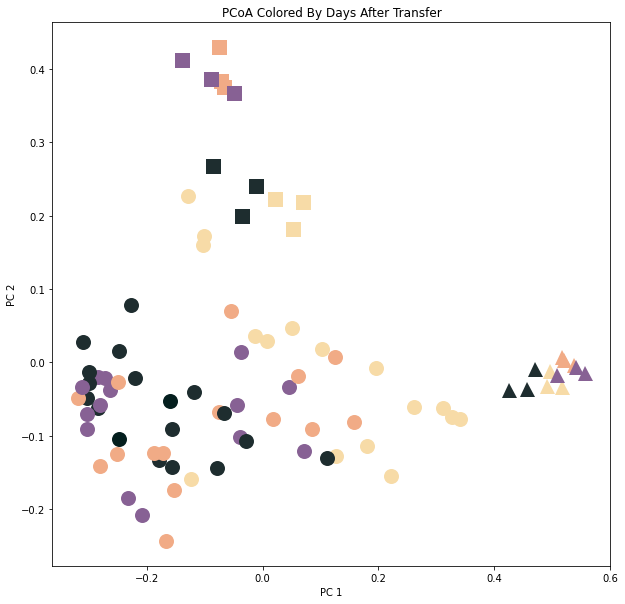

In [49]:
f, ax = plt.subplots(figsize=(10, 10))
for sample_label in df_counts_rel.index:
    data = bc_pc.samples.loc[sample_label]
    # set plot variables
    carbon_style = map_carbon_shapes[df_annotations.loc[sample_label, "carbon"]]
    day_style = map_days_colors[df_annotations.loc[sample_label, "day"]]
    transfer_style = map_transfers_colors[df_annotations.loc[sample_label, "transfer"]]    
    # set plot styling
    plotline = ax.plot(data["PC1"], data["PC2"])
    plt.setp(plotline, markersize=15, color=day_style, marker=carbon_style, markeredgecolor=transfer_style, markeredgewidth=0)
ax.set_title("PCoA Colored By Days After Transfer")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")

From the PCoA plots, we can see the clustering of carbon source glucose and carbon source malate. There is also an interesting trend where the left side of the cellulose cluster is from smaller days, and the right side of the cellulose cluster is from larger days, maybe indicating the presence of a transition state? Maybe some bacteria do not transfer well and need a few days to recover?

Text(0.5, 0, 'PC 3')

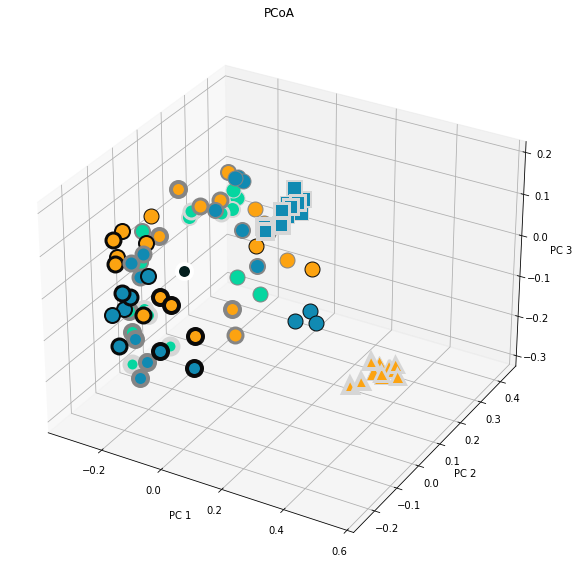

In [50]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

for sample_label in df_counts_rel.index:
    data = bc_pc.samples.loc[sample_label]
    # set plot variables
    series_style = map_carbon_colors[df_annotations.loc[sample_label, "series"]]
    carbon_style = map_carbon_shapes[df_annotations.loc[sample_label, "carbon"]]
    day_style = map_days_widths[df_annotations.loc[sample_label, "day"]]
    transfer_style = map_transfers_colors[df_annotations.loc[sample_label, "transfer"]]    
    # set plot styling
    plotline = ax.plot(data["PC1"], data["PC2"], data["PC3"])
    plt.setp(plotline, markersize=15, color=series_style, marker=carbon_style, markeredgecolor=transfer_style, markeredgewidth=day_style)
ax.set_title("PCoA")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")

Text(0.5, 0, 'PC 3')

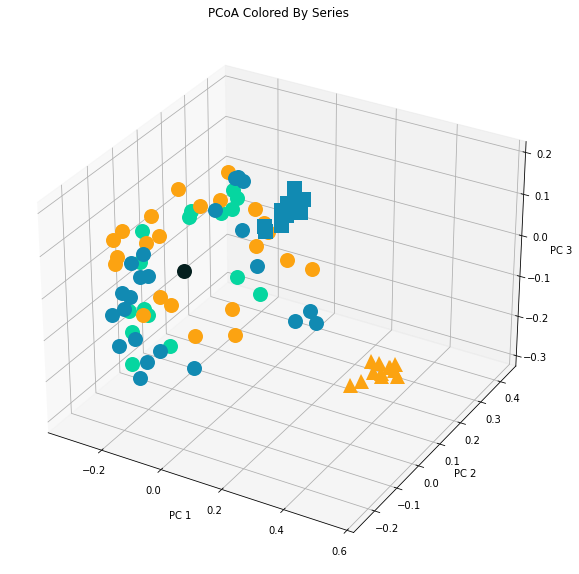

In [60]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

for sample_label in df_counts_rel.index:
    data = bc_pc.samples.loc[sample_label]
    # set plot variables
    series_style = map_carbon_colors[df_annotations.loc[sample_label, "series"]]
    carbon_style = map_carbon_shapes[df_annotations.loc[sample_label, "carbon"]]
    # set plot styling
    plotline = ax.plot(data["PC1"], data["PC2"], data["PC3"])
    plt.setp(plotline, markersize=15, color=series_style, marker=carbon_style, markeredgecolor=None, markeredgewidth=0)
ax.set_title("PCoA Colored By Series")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")

Text(0.5, 0, 'PC 3')

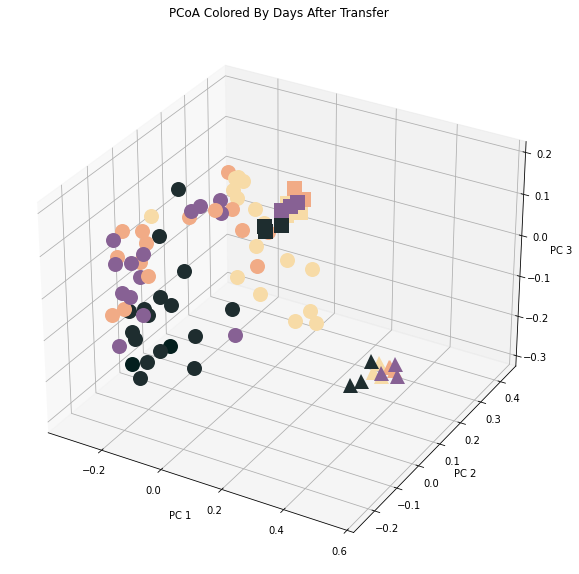

In [51]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

for sample_label in df_counts_rel.index:
    data = bc_pc.samples.loc[sample_label]
    # set plot variables
    carbon_style = map_carbon_shapes[df_annotations.loc[sample_label, "carbon"]]
    day_style = map_days_colors[df_annotations.loc[sample_label, "day"]]
    transfer_style = map_transfers_colors[df_annotations.loc[sample_label, "transfer"]]    
    # set plot styling
    plotline = ax.plot(data["PC1"], data["PC2"], data["PC3"])
    plt.setp(plotline, markersize=15, color=day_style, marker=carbon_style, markeredgecolor=None, markeredgewidth=0)
ax.set_title("PCoA Colored By Days After Transfer")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")

Text(0.5, 0, 'PC 3')

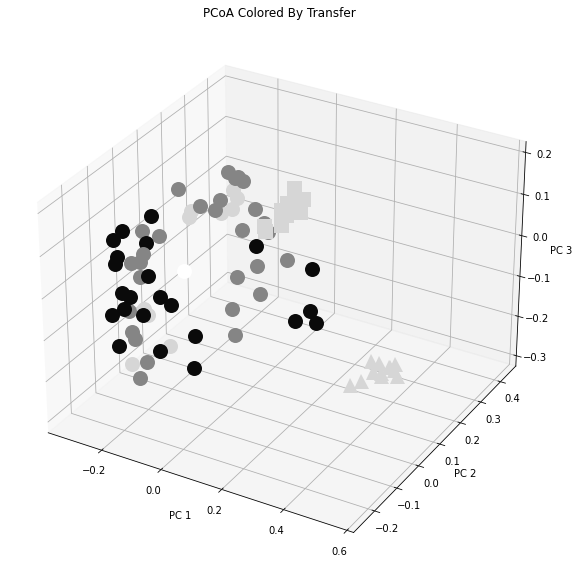

In [52]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

for sample_label in df_counts_rel.index:
    data = bc_pc.samples.loc[sample_label]
    # set plot variables
    carbon_style = map_carbon_shapes[df_annotations.loc[sample_label, "carbon"]]
    day_style = map_days_colors[df_annotations.loc[sample_label, "day"]]
    transfer_style = map_transfers_colors[df_annotations.loc[sample_label, "transfer"]]    
    # set plot styling
    plotline = ax.plot(data["PC1"], data["PC2"], data["PC3"])
    plt.setp(plotline, markersize=15, color=transfer_style, marker=carbon_style, markeredgecolor=None, markeredgewidth=0)
ax.set_title("PCoA Colored By Transfer")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")